# ONNX Conversion

In [1]:
keras_model_f = '../model/lesimpson.h5'
onnx_model_f = '../model/lesimpson.onnx'

In [3]:
import onnx
import onnxruntime
import keras2onnx
import keras
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [4]:
keras_model = keras.models.load_model(keras_model_f)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.




In [13]:
labels = [
    'maggie_simpson',
    'charles_montgomery_burns',
    'patty_bouvier',
    'ralph_wiggum',
    'chief_wiggum',
    'milhouse_van_houten',
    'martin_prince',
    'lenny_leonard',
    'sideshow_bob',
    'selma_bouvier',
    'barney_gumble',
    'moe_szyslak', 
    'carl_carlson',
    'edna_krabappel',
    'snake_jailbird',
    'groundskeeper_willie',
    'ned_flanders',
    'abraham_grampa_simpson',
    'krusty_the_clown',
    'waylon_smithers',
    'apu_nahasapeemapetilon',
    'marge_simpson',
    'comic_book_guy',
    'nelson_muntz',
    'mayor_quimby',
    'kent_brockman',
    'professor_john_frink', 
    'principal_skinner', 
    'bart_simpson',
    'lisa_simpson',
    'homer_simpson'
]

In [5]:
onnx_model = keras2onnx.convert_keras(keras_model, 'lesimpson')

onnx.save_model(onnx_model, onnx_model_f)

## Load ONNX Model

In [8]:
sess = onnxruntime.InferenceSession(onnx_model_f)

In [9]:
_in = sess.get_inputs()[0]
_out = sess.get_outputs()[0]

_in.name, _in.shape, _out.name, _out.shape

('conv2d_9_input', ['N', 50, 50, 3], 'activation_21', ['N', 31])

### Load test image

In [10]:
test_im = cv2.imread('../the-simpsons-characters-dataset/kaggle_simpson_testset/kaggle_simpson_testset/bart_simpson_0.jpg')
test_im = cv2.resize(test_im, (50, 50))

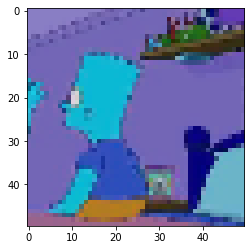

In [11]:
plt.imshow(test_im)
plt.show()

### Predict image with onnx sess

In [18]:
test_im = test_im / 255

out = sess.run([_out.name], {_in.name: np.array([test_im.astype(np.float32)])})[0]

In [19]:
pred = np.argmax(out)

labels[pred]

'bart_simpson'